<a href="https://colab.research.google.com/github/Binarybug-debug/Dynamics-/blob/main/Python%20Loops%20and%20Functions%20-%20Cumulative%20Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python Loops and Functions - Cumulative Lab

## Introduction

You made it through another section — excellent work! This cumulative lab will return to the Amazon product review dataset and allow you to flex your new skills.

## Objectives

You will be able to:

 - Recall what you learned in the previous section
 - Practice writing loops to pull multiple pieces of data from a dataset
 - Practice writing functions for organization and avoiding repetition

## Your Task: Dynamically Query Amazon Review Data

Once again, we are going to be working with data collected by Computer Science researchers at the University of California, San Diego. Their full paper citation is here:
> **Justifying recommendations using distantly-labeled reviews and fined-grained aspects**
Jianmo Ni, Jiacheng Li, Julian McAuley
Empirical Methods in Natural Language Processing (EMNLP), 2019
[pdf](http://cseweb.ucsd.edu/~jmcauley/pdfs/emnlp19a.pdf)

We are still using a cleaned-up, coffee-specific, sample version of their [full dataset](https://nijianmo.github.io/amazon/index.html).

![pouring coffee](https://curriculum-content.s3.amazonaws.com/data-science/images/coffee.jpg)
<span>Photo by <a href="https://unsplash.com/@dumdidu?utm_source=unsplash&amp;utm_medium=referral&amp;utm_content=creditCopyText">Philipp Cordts</a> on <a href="https://unsplash.com/s/photos/coffee-pot?utm_source=unsplash&amp;utm_medium=referral&amp;utm_content=creditCopyText">Unsplash</a></span>

In some cases, we will write the function signature for you, e.g.

```python
def review_sentiment(review):
    # Replace None with appropriate code
    None
```

Then you just need to fill in the relevant logic.

In other cases, you will need to write the function signature yourself, e.g.

```python
# Your code here
```

### Requirements

#### 1. Data Summary
While reusing some code from the previous cumulative lab, write code to loop over all of the records in the dataset to summarize its contents, specifically in terms of overall review sentiment and the years when the reviews were written.

#### 2. Subset Sample
Provide a sample of records that meet particular criteria.

#### 3. Individual Review Summary
Refactor the code from the previous cumulative lab so that it is contained in a function and prompts the user to select which review to summarize.

## Data Summary

Once again, we've opened up the dataset and loaded it into a list of dictionaries called `reviews`.

In [1]:
# Run this cell without changes
import json
with open("coffee_product_reviews.json") as f:
    reviews = json.load(f)
type(reviews)

list

Previously, we found the length of the collection, and looked into the data types of each record's keys and values

In [3]:
# Run this cell without changes
num_reviews = len(reviews)
print("The coffee product review dataset contains {} reviews".format(num_reviews))
#print(f"The coffee product review dataset contains {num_reviews} reviews")
first_review = reviews[0]
first_review

The coffee product review dataset contains 86 reviews


{'rating': 5.0,
 'reviewer_name': 'Sns073194',
 'product_id': 'B00004RFRV',
 'review_title': 'Perfect cafsito every time',
 'review_time': '03 11, 2018',
 'images': ['https://images-na.ssl-images-amazon.com/images/I/71d2cQEgJsL._SY88.jpg'],
 'styles': {'Size:': ' 6-Cup', 'Color:': ' Silver'}}

In [4]:
# Run this cell without changes
first_review.keys()

dict_keys(['rating', 'reviewer_name', 'product_id', 'review_title', 'review_time', 'images', 'styles'])

In [5]:
# Run this cell without changes
first_review.values()

dict_values([5.0, 'Sns073194', 'B00004RFRV', 'Perfect cafsito every time', '03 11, 2018', ['https://images-na.ssl-images-amazon.com/images/I/71d2cQEgJsL._SY88.jpg'], {'Size:': ' 6-Cup', 'Color:': ' Silver'}])

This time, let's do something a bit more sophisticated. Specifically:

1. Count of positive, negative, and neutral reviews
2. List of years contained in the dataset

### Count of Positive, Negative, and Neutral Reviews

Previously, we wrote something like this code to determine whether a specific review was positive, negative, or neutral:

In [6]:
# Run this cell without changes
selected_review = reviews[2]
selected_rating = selected_review["rating"]

if selected_rating >= 4:
    print("This is a positive review")
elif selected_rating <= 2:
    print("This is a negative review")
else:
    print("This is a neutral review")

This is a positive review


Now, rewrite that code as a function `review_sentiment`, which takes in a review dictionary as an argument, and returns the string `"positive"`, `"negative"`, or `"neutral"`

In [7]:
def review_sentiment(review):
    # Replace None with appropriate code
    selected_rating = review["rating"]
    if selected_rating >= 4:
     print("This is a positive review")
    elif selected_rating <= 2:
     print("This is a negative review")
    else:
     print("This is a neutral review")

In [8]:
# Run this cell without changes
review_sentiment(reviews[2]) # 'positive'

This is a positive review


In [9]:
# Run this cell without changes
review_sentiment(reviews[4]) # 'negative'

This is a negative review


In [10]:
# Run this cell without changes
review_sentiment(reviews[47]) # 'neutral'

This is a neutral review


Ok, this is already much cleaner than copying and pasting that `if`/`elif`/`else` sequence like we did before!

Now, write a function to loop over all of the reviews in the list, and count how many are positive, negative, and neutral.

The function should be called `get_sentiment_counts`, take one argument (the list of reviews), and return a dictionary containing the counts. A counter dictionary has been initialized for you with `"positive"`, `"negative"`, and `"neutral"` as the keys and values starting at 0.

In [12]:
def get_sentiment_counts(review_list):

    sentiment_counts = {
        "positive": 0,
        "negative": 0,
        "neutral": 0
    }

    # Your code here
    for rev in review_list:
      if rev["rating"] >= 4:
       sentiment_counts["positive"] +=1
      elif rev["rating"] <=2:
        sentiment_counts["negative"] +=1
      else:
        sentiment_counts["neutral"] +=1

    return sentiment_counts

get_sentiment_counts(reviews) # {'positive': 67, 'negative': 15, 'neutral': 4}

{'positive': 67, 'negative': 15, 'neutral': 4}

Let us define a dictionary of the sentiment_counts and do a bar plot

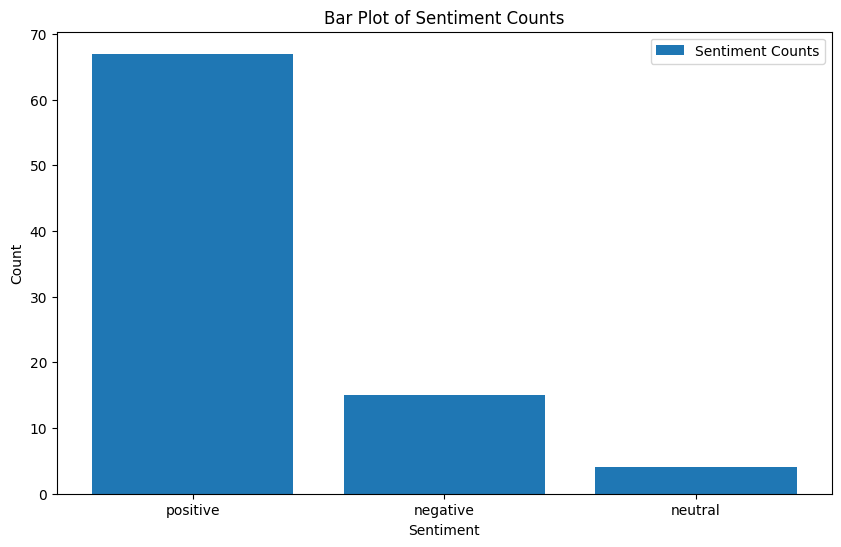

In [19]:
sentiment_counts = get_sentiment_counts(reviews)
x = sentiment_counts.keys()
x
y = sentiment_counts.values()
y
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib_inline

plt.figure(figsize=(10,6))
plt.bar(x,y, label = "Sentiment Counts")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.title("Bar Plot of Sentiment Counts")
plt.legend()
plt.show()


This spread of sentiments seems reasonable. There is a well-known [skew towards positive reviews in general](https://dspace.mit.edu/handle/1721.1/111093), similar to "grade inflation", and people with neutral opinions are less likely to write reviews in the first place.

### List of Years Contained in the Dataset

Previously, we wrote something like this code to extract the year of a review from the review dictionary:

In [20]:
# Run this cell without changes
selected_review = reviews[2]
selected_review_time = selected_review["review_time"]
selected_review_year = int(selected_review_time[-4:])
selected_review_year

2017

Now, rewrite that code as a function `review_year`, which takes in a review dictionary as an argument, and returns the year as an integer:

In [21]:
def review_year(review):
    # Replace None with appropriate code
    return int(review["review_time"][-4:])

In [22]:
# Run this cell without changes
review_year(reviews[2]) # 2017

2017

In [23]:
# Run this cell without changes
review_year(reviews[4]) # 2017

2017

In [24]:
# Run this cell without changes
review_year(reviews[47]) # 2015

2015

Now, write a function called `get_years` to loop over all of the reviews in the review list and create a list of the years you find. Each year should only appear once, in ascending order. The function should accept one argument (`review_list`) and should return a list of integers representing the years.

Hints:

 - Remember that you can use the `set()` function to keep only the unique elements in a list. Just make sure you use `list()` afterwards to convert it back to a list data type. This is not the only solution, however!
 - There is a list method named `.sort()` ([look it up in the python list documentation here](https://docs.python.org/3/tutorial/datastructures.html#more-on-lists)) that will automatically order the years; you don't need to write sorting logic "by hand"

In [29]:
# Your code here
def get_years(review_list):
  review_years = set()
  for review in review_list:
    review_years.add(int(review["review_time"][-4:]))
  review_years_lst = list(review_years)

  return sorted(review_years_lst)

print(get_years(reviews)) # [2007, 2008, 2009, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
print(type(get_years(reviews))) # <class 'list'>

[2007, 2008, 2009, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
<class 'list'>


Now we know that we have data spanning 2007-2018, with no data from 2010. In some contexts that absence might be worth investigating — is it a random artifact of our sample, or are we missing 2010 data for a reason that matters? For now we'll just keep moving on to the next section, now that we have a clearer sense of the kinds of reviews in our dataset and the years they were written.

## Subset Sampling

Once you have an overall sense of a dataset, it's a good idea to ask *what are some examples of records in each category?* For example, what are some examples of a negative review?

Although 86 records are few enough that you could technically read through all of them and just mentally note what we see, let's use an approach that will scale better to larger datasets with more categories: **filtering** to a subset of records then **sampling** to achieve a digestible amount of information.

### Filtering

Here we are going to make use of another built-in Python function: `filter()` ([docs here](https://docs.python.org/3/library/functions.html#filter)). To use this function, we first need to write a helper function that returns `True` or `False` based on the value passed in.

So, create a function `is_negative` that takes in a review dictionary as an argument and returns `True` if the review is negative, `False` otherwise:

In [30]:
def is_negative(review):
    # Replace None with appropriate code
    if review["rating"] <=2:
      return True
    else:
      return False

print(is_negative(reviews[2]))  # False (postive review)
print(is_negative(reviews[4]))  # True
print(is_negative(reviews[47])) # False (neutral review)

False
True
False


Now we can use the `filter()` function to create a list of negative reviews:

In [31]:
# Run this cell without changes
list(filter(is_negative, reviews))

[{'rating': 1.0,
  'reviewer_name': 'EJ',
  'product_id': 'B00004RFRV',
  'review_title': 'Rusted spots everywhere fresh out the box...nasty',
  'review_time': '06 4, 2017',
  'images': ['https://images-na.ssl-images-amazon.com/images/I/71Dbr6X0bYL._SY88.jpg'],
  'styles': {'Size:': ' 9-Cup', 'Color:': ' Silver'}},
 {'rating': 1.0,
  'reviewer_name': 'mathman54',
  'product_id': 'B00004RFRV',
  'review_title': "The bottom looks like it has rusted and I don't know how to ...",
  'review_time': '02 15, 2016',
  'images': ['https://images-na.ssl-images-amazon.com/images/I/71qt4Hnra8L._SY88.jpg',
   'https://images-na.ssl-images-amazon.com/images/I/71Wkg8MesdL._SY88.jpg'],
  'styles': {'Size:': ' 12-Cup', 'Color:': ' Silver'}},
 {'rating': 1.0,
  'reviewer_name': 'Maria Fernandez',
  'product_id': 'B00004RFRV',
  'review_title': 'Is it a Bialetti? Came dirty with coffee grounds.',
  'review_time': '03 22, 2015',
  'images': ['https://images-na.ssl-images-amazon.com/images/I/71aPg3ZuCzL._SY

Write a function called `get_negative_reviews` that returns a list of these reviews. It should take the list of all reviews as an argument.

(This can be a one-line function.)

In [32]:
# Your code here
def get_negative_reviews(reviews):
  negative_revs = []
  for rev in reviews:
    if rev["rating"] <=2:
      negative_revs.append(rev)
  return negative_revs


len(get_negative_reviews(reviews)) # 15

15

### Sampling

Again, since we have a relatively small dataset, we could just look at all 15 reviews. But let's take a more scalable approach instead, and take a random sample of negative reviews.

Recall the `random` module, which must be imported:

In [33]:
# Run this cell without changes
import random

We'll use the `random.sample()` function, which takes in a collection and a number, and returns that number of elements from the collection.

So, for example, if we want 3 negative reviews:

In [34]:
# Run this cell without changes
# You can run as many times as you want, to see different sample examples
random.sample(get_negative_reviews(reviews), 3)

[{'rating': 1.0,
  'reviewer_name': 'GoClick',
  'product_id': 'B00005OTXM',
  'review_title': 'Returned - produced revolting burnt plastic flavored coffee, and seemed flawed.',
  'review_time': '04 16, 2015',
  'images': ['https://images-na.ssl-images-amazon.com/images/I/71o+7Zru+iL._SY88.jpg',
   'https://images-na.ssl-images-amazon.com/images/I/81sbfP4tc8L._SY88.jpg',
   'https://images-na.ssl-images-amazon.com/images/I/71vhOebyGaL._SY88.jpg'],
  'styles': {'Style Name:': ' COFFEE MAKER ONLY'}},
 {'rating': 2.0,
  'reviewer_name': 'Jimmie',
  'product_id': 'B0000A1ZMS',
  'review_title': 'Leaks and more',
  'review_time': '01 13, 2011',
  'images': ['https://images-na.ssl-images-amazon.com/images/I/51U4K+PzETL._SY88.jpg'],
  'styles': {'Color:': ' Black', 'Style Name:': ' Coffeemaker'}},
 {'rating': 2.0,
  'reviewer_name': 'Picks n Pans',
  'product_id': 'B00006F2LW',
  'review_title': 'Cracked lid out of the box',
  'review_time': '02 27, 2008',
  'images': ['https://images-na.ssl-

Now, put that code into a function `get_negative_review_sample`. This function should take a list of reviews and the number of samples to select, and should return a sample of negative reviews.

(You can assume that `num_samples` is a valid number. The number of samples must be less than or equal to the number of elements in the collection.)

In [60]:
def get_negative_review_sample(review_list, num_samples):
    # Replace None with appropriate code
    return random.sample(get_negative_reviews(review_list),num_samples)

get_negative_review_sample(reviews, 4)

[{'rating': 1.0,
  'reviewer_name': 'fifrox',
  'product_id': 'B00005MF9C',
  'review_title': 'Works great for a week then fails!',
  'review_time': '03 10, 2016',
  'images': ['https://images-na.ssl-images-amazon.com/images/I/81QVkUT4hdL._SY88.jpg'],
  'styles': {'Color:': ' Black/Stainless Steel'}},
 {'rating': 1.0,
  'reviewer_name': 'Andrew Furlong',
  'product_id': 'B00005MF9C',
  'review_title': 'but instead ran along the underside of the part of the maker that holds the grounds and finally dropping at an angle at which a',
  'review_time': '02 22, 2017',
  'images': ['https://images-na.ssl-images-amazon.com/images/I/71kh1XatynL._SY88.jpg'],
  'styles': {'Color:': ' Black/Stainless Steel'}},
 {'rating': 1.0,
  'reviewer_name': 'Marcia S.',
  'product_id': 'B0000A1ZMS',
  'review_title': 'Look what happened to this once great Cuisinart coffeemaker.',
  'review_time': '11 12, 2016',
  'images': ['https://images-na.ssl-images-amazon.com/images/I/51B8eue4nHL._SY88.jpg',
   'https://i

Repeat the same process for positive reviews. That means we need:

1. A helper function `is_positive` (this can't just be `not is_negative` since neutral reviews are neither)
2. A function `get_positive_reviews` which returns a list of all positive reviews
3. A function `get_positive_review_sample` which returns a sample of positive reviews with the specified length

In [40]:
# Your code here
# Your code here
def get_positive_reviews(reviews):
  positive_revs = []
  for rev in reviews:
    if rev["rating"] >=4:
      positive_revs.append(rev)
  return positive_revs

def get_positive_review_sample(review_list, num_samples):
    # Replace None with appropriate code
    return random.sample(get_positive_reviews(review_list),num_samples)


len(get_positive_reviews(reviews)) # 15
get_positive_review_sample(reviews, 4)

[{'rating': 5.0,
  'reviewer_name': 'mamacarla',
  'product_id': 'B0000A1ZMS',
  'review_title': 'Cute, functional',
  'review_time': '01 3, 2014',
  'images': ['https://images-na.ssl-images-amazon.com/images/I/71hUhHKHgQL._SY88.jpg'],
  'styles': {'Color:': ' Pink', 'Style Name:': ' Coffeemaker'}},
 {'rating': 4.0,
  'reviewer_name': 'Honest Rating',
  'product_id': 'B00005LM0V',
  'review_title': 'absolutely gorgeous!',
  'review_time': '04 3, 2012',
  'images': ['https://images-na.ssl-images-amazon.com/images/I/716bNNBjFSL._SY88.png'],
  'styles': {'Size:': ' 34 oz.', 'Color:': ' Gold'}},
 {'rating': 4.0,
  'reviewer_name': 'Kort',
  'product_id': 'B00006IZY5',
  'review_title': 'Good Gift For A Coffee Connoisseur On Your List',
  'review_time': '10 5, 2017',
  'images': ['https://images-na.ssl-images-amazon.com/images/I/71gkR6uADvL._SY88.jpg',
   'https://images-na.ssl-images-amazon.com/images/I/61EFi0ZC8AL._SY88.jpg',
   'https://images-na.ssl-images-amazon.com/images/I/71R4QHP3XK

## Individual Review Summary

In addition to summarizing the dataset overall and sampling based on criteria, we want the user to be able to query any given record in order to view a summary. Before, we created a variable called `review_index` that the user could modify. Now, let's write some reusable code that doesn't require the user to write any Python at all!

Recall that before, our final code looked something like this:

In [41]:
# Run this cell without changes

review_index = 2

# Extract review from list of reviews
selected_review = reviews[review_index]

# Extract title
selected_review_title = selected_review["review_title"]

# Extract rating and format as positive, negative, or neutral
selected_rating = selected_review["rating"]
if selected_rating >= 4:
    selected_sentiment = "positive"
elif selected_rating <= 2:
    selected_sentiment = "negative"
else:
    selected_sentiment = "neutral"

# Extract author
selected_author = selected_review["reviewer_name"]

# Extract year (doesn't need to be int for this use case)
selected_year = selected_review["review_time"][-4:]

print(f'"{selected_review_title}": This was a {selected_sentiment} review written by {selected_author} in {selected_year}.')

"Bialetti is the Best!": This was a positive review written by Karen in 2017.


Rewrite that code as a function called `get_review_summary`, which takes a review dictionary as an argument, and returns a string that resembles the previous summary string, e.g.

```
"Bialetti is the Best!": This was a positive review written by Karen in 2017.
```

*Hint: look back at the functions you have previously written to see which ones might be useful to call within this function!*

In [57]:
# Your code here
def get_review_summary(selected_review):
 selected_review_title = selected_review["review_title"]

 # Extract rating and format as positive, negative, or neutral
 selected_rating = selected_review["rating"]
 if selected_rating >= 4:
    selected_sentiment = "positive"
 elif selected_rating <= 2:
    selected_sentiment = "negative"
 else:
    selected_sentiment = "neutral"

 # Extract author
 selected_author = selected_review["reviewer_name"]

 # Extract year (doesn't need to be int for this use case)
 selected_year = selected_review["review_time"][-4:]

 return f'"{selected_review_title}": This was a {selected_sentiment} review written by {selected_author} in {selected_year}.'

get_review_summary(reviews[2]) # "Bialetti is the Best!": This was a positive review written by Karen in 2017.

'"Bialetti is the Best!": This was a positive review written by Karen in 2017.'

Now, instead of copying and pasting that every time, we can just call it repeatedly!

Write a function that prompts the user to enter a review index, then prints the relevant review summary. The function should be called `review_summary_prompt`, it should take a list of reviews as an argument, and should print information but not return anything.

Display the message `"Please enter a review index: "` when prompting for input. You can assume that the user will enter a valid index between 0 and 85.

Hints:

 - Use the built-in `input()` function ([check the documentation here to see how to use it!](https://docs.python.org/3/library/functions.html#input))
 - Remember that this function always returns a string, so you will have to convert the user-supplied index into an integer, otherwise you'll get the error `TypeError: list indices must be integers or slices, not str`
 - If you're wondering about the type of a given variable, you can use the built-in `type()` function

In [48]:
def review_summary_prompt(list_of_reviews):
   # Replace None with appropriate code
   index = int(input("Please enter a review Index Between 0 and 85\t "))
   # Extract rating and format as positive, negative, or neutral
   selected_review = list_of_reviews[index]
   selected_review_title = selected_review["review_title"]
   selected_rating = selected_review["rating"]
   if selected_rating >= 4:
    selected_sentiment = "positive"
   elif selected_rating <= 2:
    selected_sentiment = "negative"
   else:
    selected_sentiment = "neutral"

   # Extract author
   selected_author = selected_review["reviewer_name"]

   # Extract year (doesn't need to be int for this use case)
   selected_year = selected_review["review_time"][-4:]

   print(f'"{selected_review_title}": This was a {selected_sentiment} review written by {selected_author} in {selected_year}.')



Run this cell, and try entering 2, 4, 52 (examples of positive, negative, neutral reviews)

You can also try any index you want, between 0 and 85!

In [49]:
# Run this cell without changes
review_summary_prompt(reviews)

Please enter a review Index Between 0 and 85	 2
"Bialetti is the Best!": This was a positive review written by Karen in 2017.


In [50]:
# Run this cell without changes
review_summary_prompt(reviews)

Please enter a review Index Between 0 and 85	 4
"Rusted spots everywhere fresh out the box...nasty": This was a negative review written by EJ in 2017.


In [51]:
# Run this cell without changes
review_summary_prompt(reviews)

Please enter a review Index Between 0 and 85	 52
"Simple, 4 cup coffee maker, looks nice, difficult basket hinge": This was a neutral review written by Donald E. Fulton in 2012.


## Putting It All Together

In this section, we are just calling several of the previously-created functions to double-check that they are working as expected. You do not need to write any more code, although if you notice something wrong with one of your functions you can go back and fix it!  Just make sure that you re-run the cell declaring the function if you want the behavior of calling the function to change.

### Data Summary

In [52]:
# Run this cell without changes

print(f"The coffee product review dataset contains {len(reviews)} reviews")
print()
print("Review sentiment:")
for key, value in get_sentiment_counts(reviews).items():
    print(f"{value} {key} reviews")
print()
print("Review years:")
print(get_years(reviews))

The coffee product review dataset contains 86 reviews

Review sentiment:
67 positive reviews
15 negative reviews
4 neutral reviews

Review years:
[2007, 2008, 2009, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]


### Subset Samples

In [61]:
# Run this cell without changes

print("Examples of positive reviews:")
positive_samples = get_positive_review_sample(reviews, 5)
for review in positive_samples:
    print(get_review_summary(review))
print()
print("Examples of negative reviews:")
negative_samples = get_negative_review_sample(reviews, 5)
for review in negative_samples:
    print(get_review_summary(review))

Examples of positive reviews:
"Clean look.": This was a positive review written by Amazon Customer in 2017.
"Delicious results from a wonderfully simple Bialetti Moka Express!": This was a positive review written by Maverick in 2017.
"Awesome product...great price!": This was a positive review written by Julie Freeman in 2016.
"Smooo---ooo----oooo--th!!": This was a positive review written by Jonathan Sabin in 2007.
"... yet but bought what I think will be a better mug because it's stainless inside & out unlike the ...": This was a positive review written by Jan in 2017.

Examples of negative reviews:
"Too much waste": This was a negative review written by SAinVA in 2017.
"Look what happened to this once great Cuisinart coffeemaker.": This was a negative review written by Marcia S. in 2016.
"Leaks and more": This was a negative review written by Jimmie in 2011.
"Cracked lid out of the box": This was a negative review written by Picks n Pans in 2008.
"smelled like the cord was burning":

### Summary Prompt

In [54]:
# Run this cell without changes
review_summary_prompt(reviews)

Please enter a review Index Between 0 and 85	 6
"LUV IT!!!": This was a positive review written by ArmiWyf in 2016.


## Conclusion

Congratulations, you made it to the end of another cumulative lab! In this lab you practiced refactoring previously-written code to use functions, and using loops to avoid repetition and perform analyses of the whole dataset as well as certain subsets.